Upload folder `datathon_SC_ACN_22` into `/data` on your drive.
Mount drive to access data. 

In [179]:
!pip install geoplot geopandas pysal matplotlib
!pip install --upgrade pandas
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [180]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read data

In [181]:
import pandas as pd
from IPython.display import display, clear_output

data_path = '/content/drive/MyDrive/data/datathon_SC_ACN_22/'

# ports that are the same but have different names (data cleaning)
same_ports =  {
    'ATHENAS': 'Athens',
    'BCN': 'Barcelona',
}

# converters function for pd.read_csv()
convs = {
    'origin_port': lambda x: same_ports[x] if x in same_ports else x
}

orders = pd.read_csv(data_path + "orders.csv", sep=';', converters=convs, na_filter=False)
orders['late_order'] = orders['late_order'].apply(lambda x: 1 if x else 0)

cities_data = pd.read_csv(data_path + "cities_data.csv", sep=';')


# Late rates

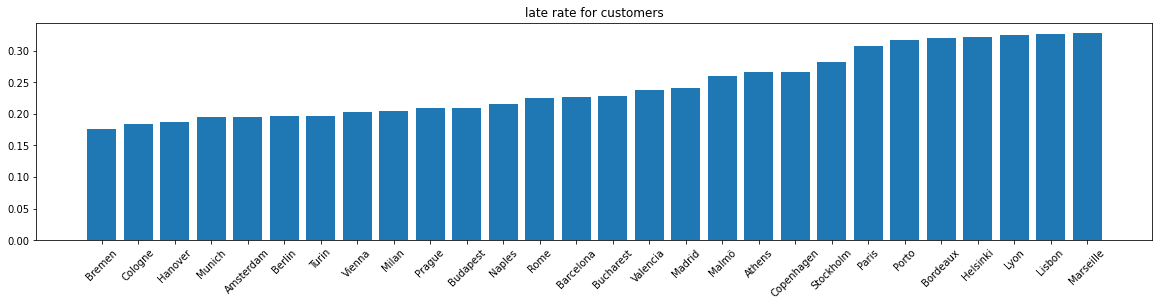

In [182]:
import matplotlib.pyplot as plt
import numpy as np

late_order_by_costumer = orders.groupby(by='customer', as_index=False).agg(late_order=('late_order', sum), total_orders=('late_order', 'count'))
late_order_by_costumer['late_rate'] = late_order_by_costumer['late_order'] / late_order_by_costumer['total_orders']
late_order_by_costumer = late_order_by_costumer.sort_values(by=['late_rate'])

fig, ax = plt.subplots(figsize=(20, 4))

x_pos = np.arange(late_order_by_costumer.shape[0])
ax.bar(x_pos, late_order_by_costumer['late_rate'])
ax.set_xticks(x_pos)
ax.set_xticklabels(late_order_by_costumer['customer'])
plt.xticks(rotation = 45)
plt.title('late rate for customers')
plt.show()

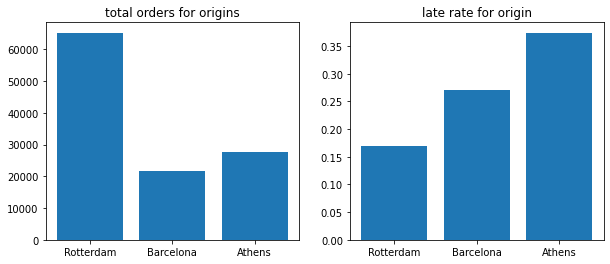

,origin_port,late_order,total_orders,late_rate
2,Rotterdam,11031,65191,0.169210
1,Barcelona,5825,21556,0.270226
0,Athens,10300,27529,0.374151


In [183]:
late_order_by_origin = orders.groupby(by='origin_port', as_index=False).agg(late_order=('late_order', sum), total_orders=('late_order', 'count'))
late_order_by_origin['late_rate'] = late_order_by_origin['late_order'] / late_order_by_origin['total_orders']
late_order_by_origin = late_order_by_origin.sort_values(by=['late_rate'])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

x_pos = np.arange(late_order_by_origin.shape[0])
ax[0].bar(x_pos, late_order_by_origin['total_orders'])
ax[0].set_xticks(x_pos)
ax[0].set_xticklabels(late_order_by_origin['origin_port'])
ax[0].set_title('total orders for origins')

ax[1].bar(x_pos, late_order_by_origin['late_rate'])
ax[1].set_xticks(x_pos)
ax[1].set_xticklabels(late_order_by_origin['origin_port'])
ax[1].set_title('late rate for origin')
plt.show()
display(late_order_by_origin)

# Plot Geographic Data

In [184]:
# create a data frame for geographic
import geopandas as gpd
cities_from = cities_data[['city_from_name', 'city_from_coord']].drop_duplicates()\
                            .rename(columns = {'city_from_name': 'city', 'city_from_coord' : 'coordinate'})
cities_to = cities_data[['city_to_name', 'city_to_coord']].drop_duplicates()\
                            .rename(columns = {'city_to_name': 'city', 'city_to_coord' : 'coordinate'})
                          
cities_location = cities_from.append(cities_to).drop_duplicates()

print('Number of cities: ' + str(cities_location.shape[0]))
display(cities_location)

def split_coordinate(s):
  s = s.replace('(', '').replace(')', '')
  x, y = s.split(',')
  return [float(x), float(y)]

cities_location['Latitude'] = cities_location['coordinate']\
    .apply(lambda x: float(x.split(',')[0][1:]))
cities_location['Longitude'] = cities_location['coordinate']\
    .apply(lambda x: float(x.split(',')[1][1:-1]))
  
cities_gdf = gpd.GeoDataFrame(
    cities_location, geometry=gpd.points_from_xy(cities_location.Longitude, cities_location.Latitude, crs="EPSG:3035"))

Number of cities: 37


,city,coordinate
0,Dusseldorf,"(51.2254018, 6.7763137)"
35,Zaragoza,"(41.6521342, -0.8809428)"
69,Venlo,"(51.39244885, 6.1511724144122955)"
102,Bratislava,"(48.1516988, 17.1093063)"
134,Hamburg,"(53.550341, 10.000654)"
165,Rome,"(41.8933203, 12.4829321)"
195,Lille,"(50.6365654, 3.0635282)"
224,Liege,"(50.6450944, 5.5736112)"
252,Warsaw,"(52.2337172, 21.071432235636493)"
279,Paris,"(48.8588897, 2.3200410217200766)"


In [185]:
# create dataframe that has for all origin, dest city combinations the number of orders
o_to_l = orders[['origin_port', 'logistic_hub']]
o_to_l = o_to_l.groupby(o_to_l.columns.tolist(),as_index=False).size()
o_to_l = o_to_l.rename(columns = {'size': 'orders'})

# create dataframe that has for all origin, dest city combinations the number of orders
l_to_c = orders[['logistic_hub', 'customer']]
l_to_c = l_to_c.groupby(l_to_c.columns.tolist(),as_index=False).size()
l_to_c = l_to_c.rename(columns = {'size': 'orders'})


In [186]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[world.continent == 'Europe']

In [187]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

## Plot worst performers

## Plot best performers

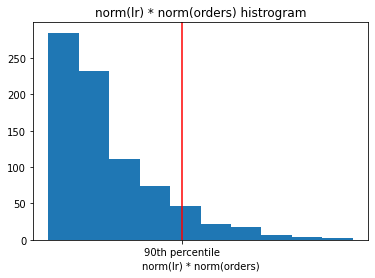

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,origin_port,logistic_hub,customer,late_order,total_orders,performance_metric
185,Athens,Venlo,Milan,171,514,1.000000
70,Athens,Hamburg,Madrid,166,431,0.933451
182,Athens,Venlo,Madrid,161,480,0.868249
171,Athens,Venlo,Berlin,147,519,0.684535
188,Athens,Venlo,Paris,144,325,0.642915


In [198]:
import matplotlib.pyplot as plt
import math

def normalize_df(data_frame):
  return (data_frame-data_frame.min())/(data_frame.max()-data_frame.min())

cmap = plt.cm.get_cmap('Reds')

df = orders.groupby(by=['origin_port', 'logistic_hub', 'customer'], as_index=False)\
  .agg(late_order=('late_order', sum), total_orders=('late_order', 'count'))
df['late_rate'] = df['late_order'] / df['total_orders']
df['total_orders_norm'] = normalize_df(df['total_orders'])
df['performance_metric'] = normalize_df(df['late_rate'] * df['total_orders_norm'])

plt.hist(df['performance_metric'])
percentile = 90
percentile_thresh = np.percentile(df['performance_metric'], percentile)
plt.xticks([percentile_thresh], labels=[f'{percentile}th percentile'])
plt.axvline(x = percentile_thresh, color = 'r', label = 'axvline - full height')
plt.title('norm(lr) * norm(orders) histrogram')
plt.xlabel('norm(lr) * norm(orders)')
plt.show()
df = df[df['performance_metric'] > np.percentile(df['performance_metric'], 95)]
df['performance_metric'] = normalize_df(df['performance_metric'] )
df = df.sort_values(by="performance_metric", ascending=False)
#df['performance_metric'] = 1-df['performance_metric']
df[['origin_port', 'logistic_hub', 'customer', 'late_order', 'total_orders', 'performance_metric']].head()

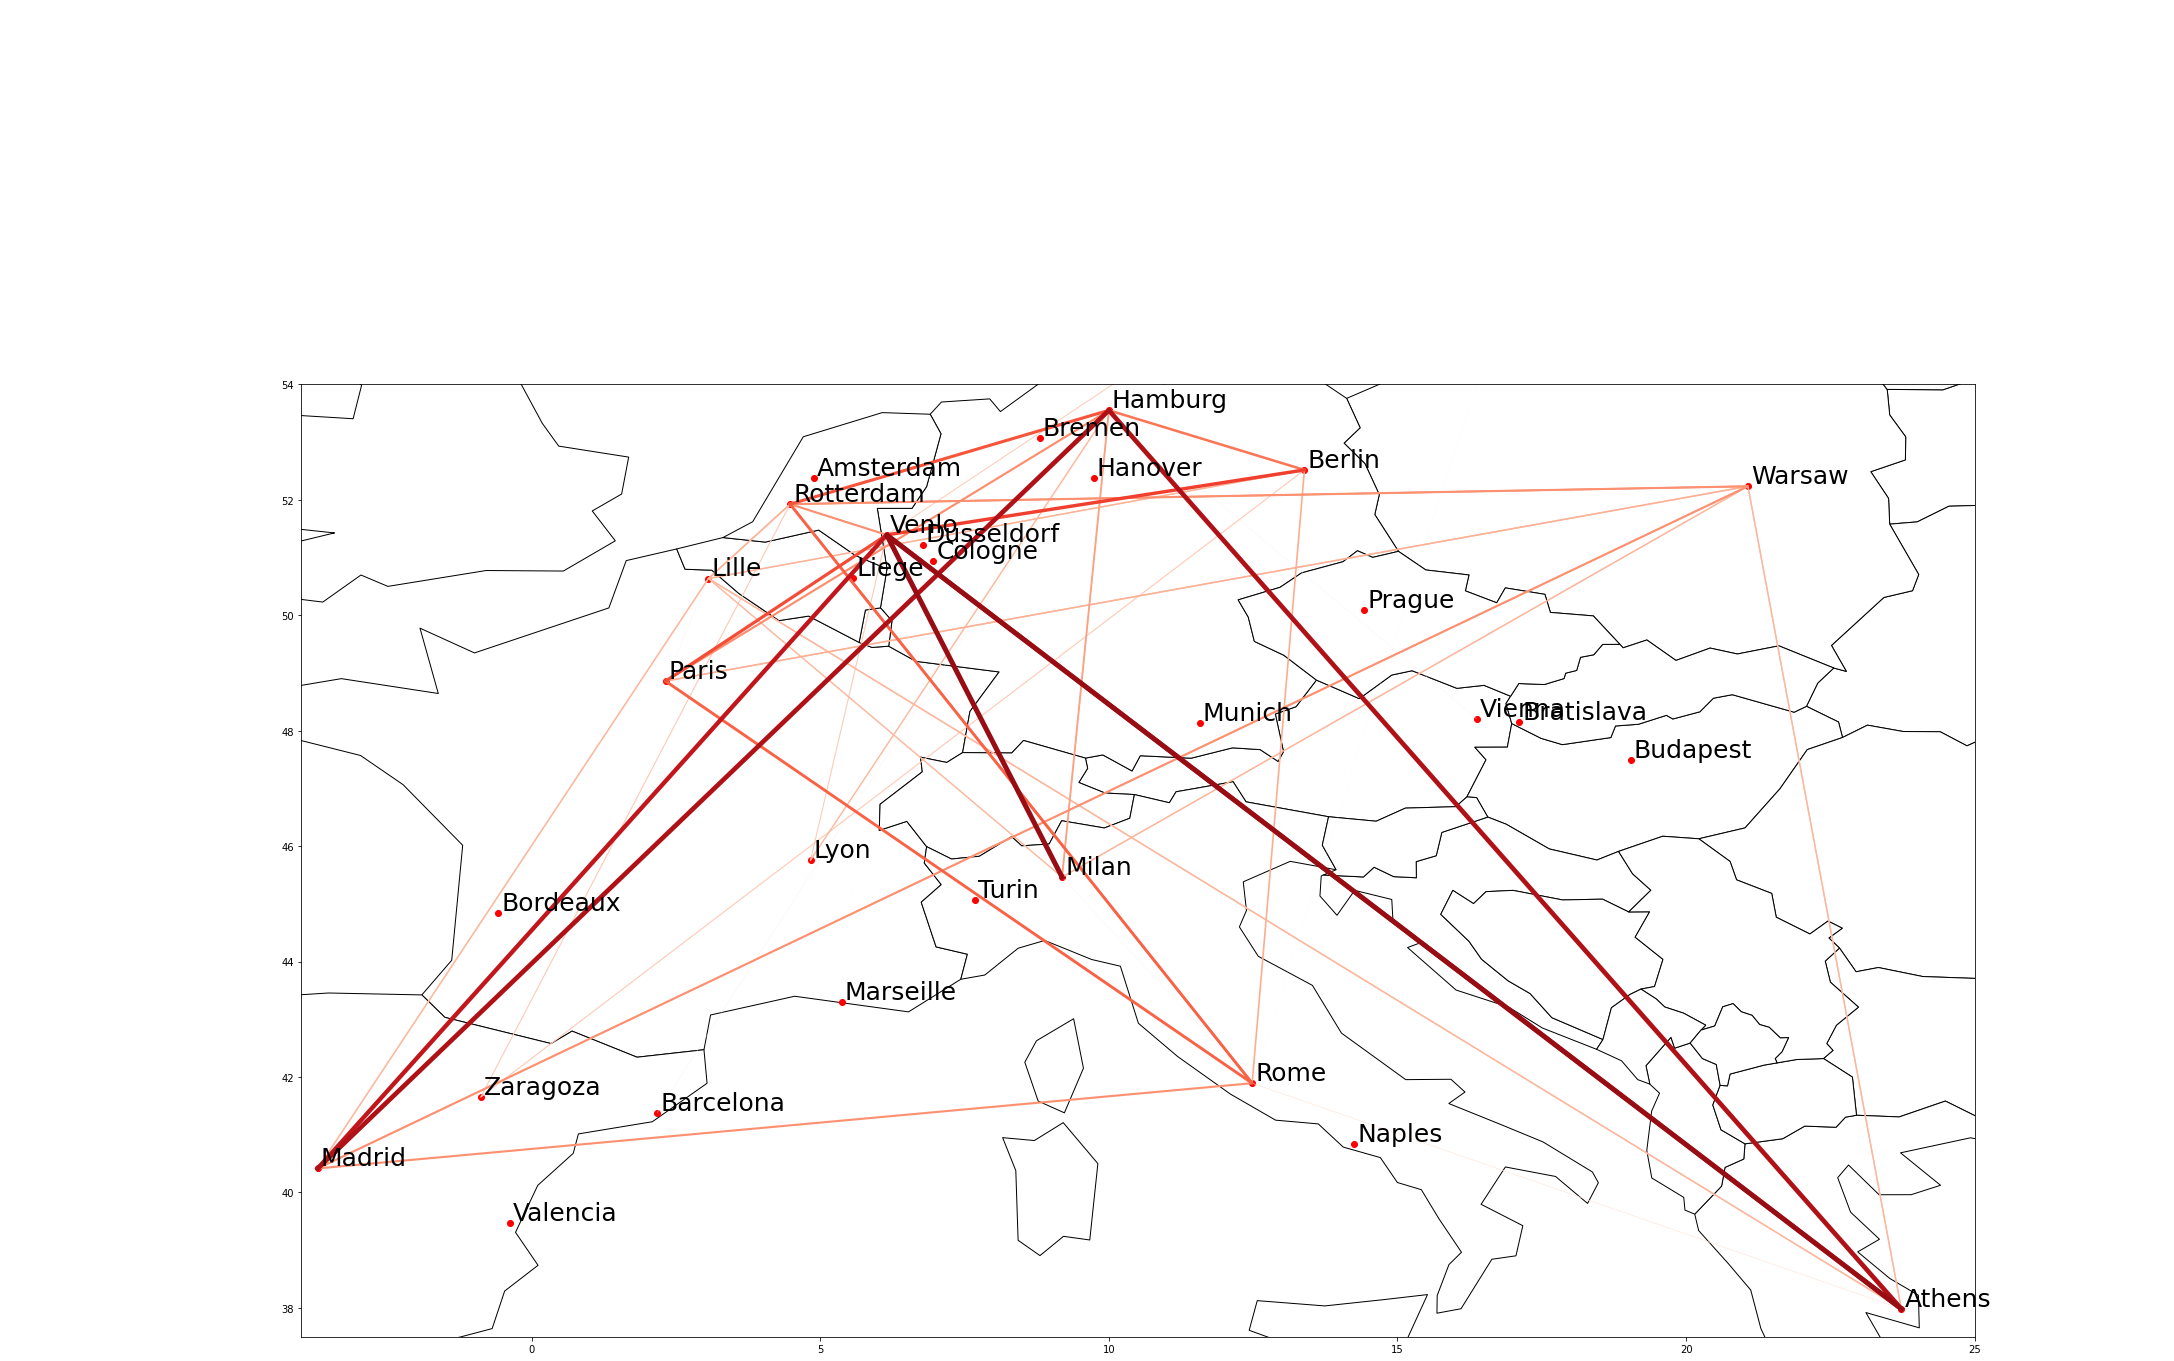

In [199]:
ax = europe.plot(
    color='white', edgecolor='black', figsize=(30, 30))
cities_gdf.plot(ax=ax, color='r')

for la, lo, label in zip(cities_gdf['Latitude'], cities_gdf['Longitude'], cities_gdf['city']):
    ax.annotate(label, xy=(lo, la), xytext=(3, 3), textcoords="offset points", size=25)

for i, order in df[::-1].iterrows():
  o, l, c, lr, im = order[['origin_port', 'logistic_hub', 'customer', 'late_rate', 'performance_metric']]
  if l != '' and c != '' and o != '':
    slat, slong = cities_gdf[cities_gdf['city'] == o].iloc[0][['Latitude', 'Longitude']]
    mlat, mlong = cities_gdf[cities_gdf['city'] == l].iloc[0][['Latitude', 'Longitude']]
    dlat, dlong = cities_gdf[cities_gdf['city'] == c].iloc[0][['Latitude', 'Longitude']]
    ax.plot([slong, mlong, dlong], [slat, mlat, dlat], linewidth=im * 5, color=cmap(im*.9))

ax.set_xlim([-4, 25])
ax.set_ylim([37.5, 54])
plt.show()

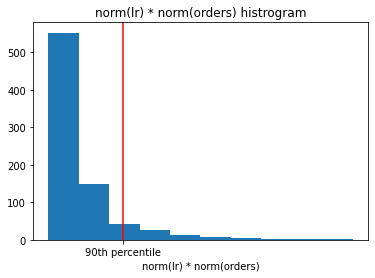

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,origin_port,logistic_hub,customer,late_order,total_orders,performance_metric
721,Rotterdam,Venlo,Berlin,75,1133,1.000000
735,Rotterdam,Venlo,Milan,97,1146,0.986963
732,Rotterdam,Venlo,Madrid,127,1077,0.843308
609,Rotterdam,Hamburg,Berlin,93,1041,0.840363
623,Rotterdam,Hamburg,Milan,112,1008,0.764914


In [200]:
df = orders.groupby(by=['origin_port', 'logistic_hub', 'customer'], as_index=False)\
  .agg(late_order=('late_order', sum), total_orders=('late_order', 'count'))
df['in_time_rate'] = 1 - (df['late_order'] / df['total_orders'])
df['total_orders_norm'] = normalize_df(df['total_orders'])
df['performance_metric'] = normalize_df(df['in_time_rate'] * df['total_orders_norm'])

df = df.sort_values(by="performance_metric")
plt.hist(df['performance_metric'])
percentile = 90
percentile_thresh = np.percentile(df['performance_metric'], percentile)
plt.xticks([percentile_thresh], labels=[f'{percentile}th percentile'])
plt.axvline(x = percentile_thresh, color = 'r', label = 'axvline - full height')
plt.title('norm(lr) * norm(orders) histrogram')
plt.xlabel('norm(lr) * norm(orders)')
plt.show()
df = df[df['performance_metric'] > np.percentile(df['performance_metric'], 95)]
df['performance_metric'] = normalize_df(df['performance_metric'] )
df = df.sort_values(by="performance_metric", ascending=False)
df[['origin_port', 'logistic_hub', 'customer', 'late_order', 'total_orders', 'performance_metric']].head()

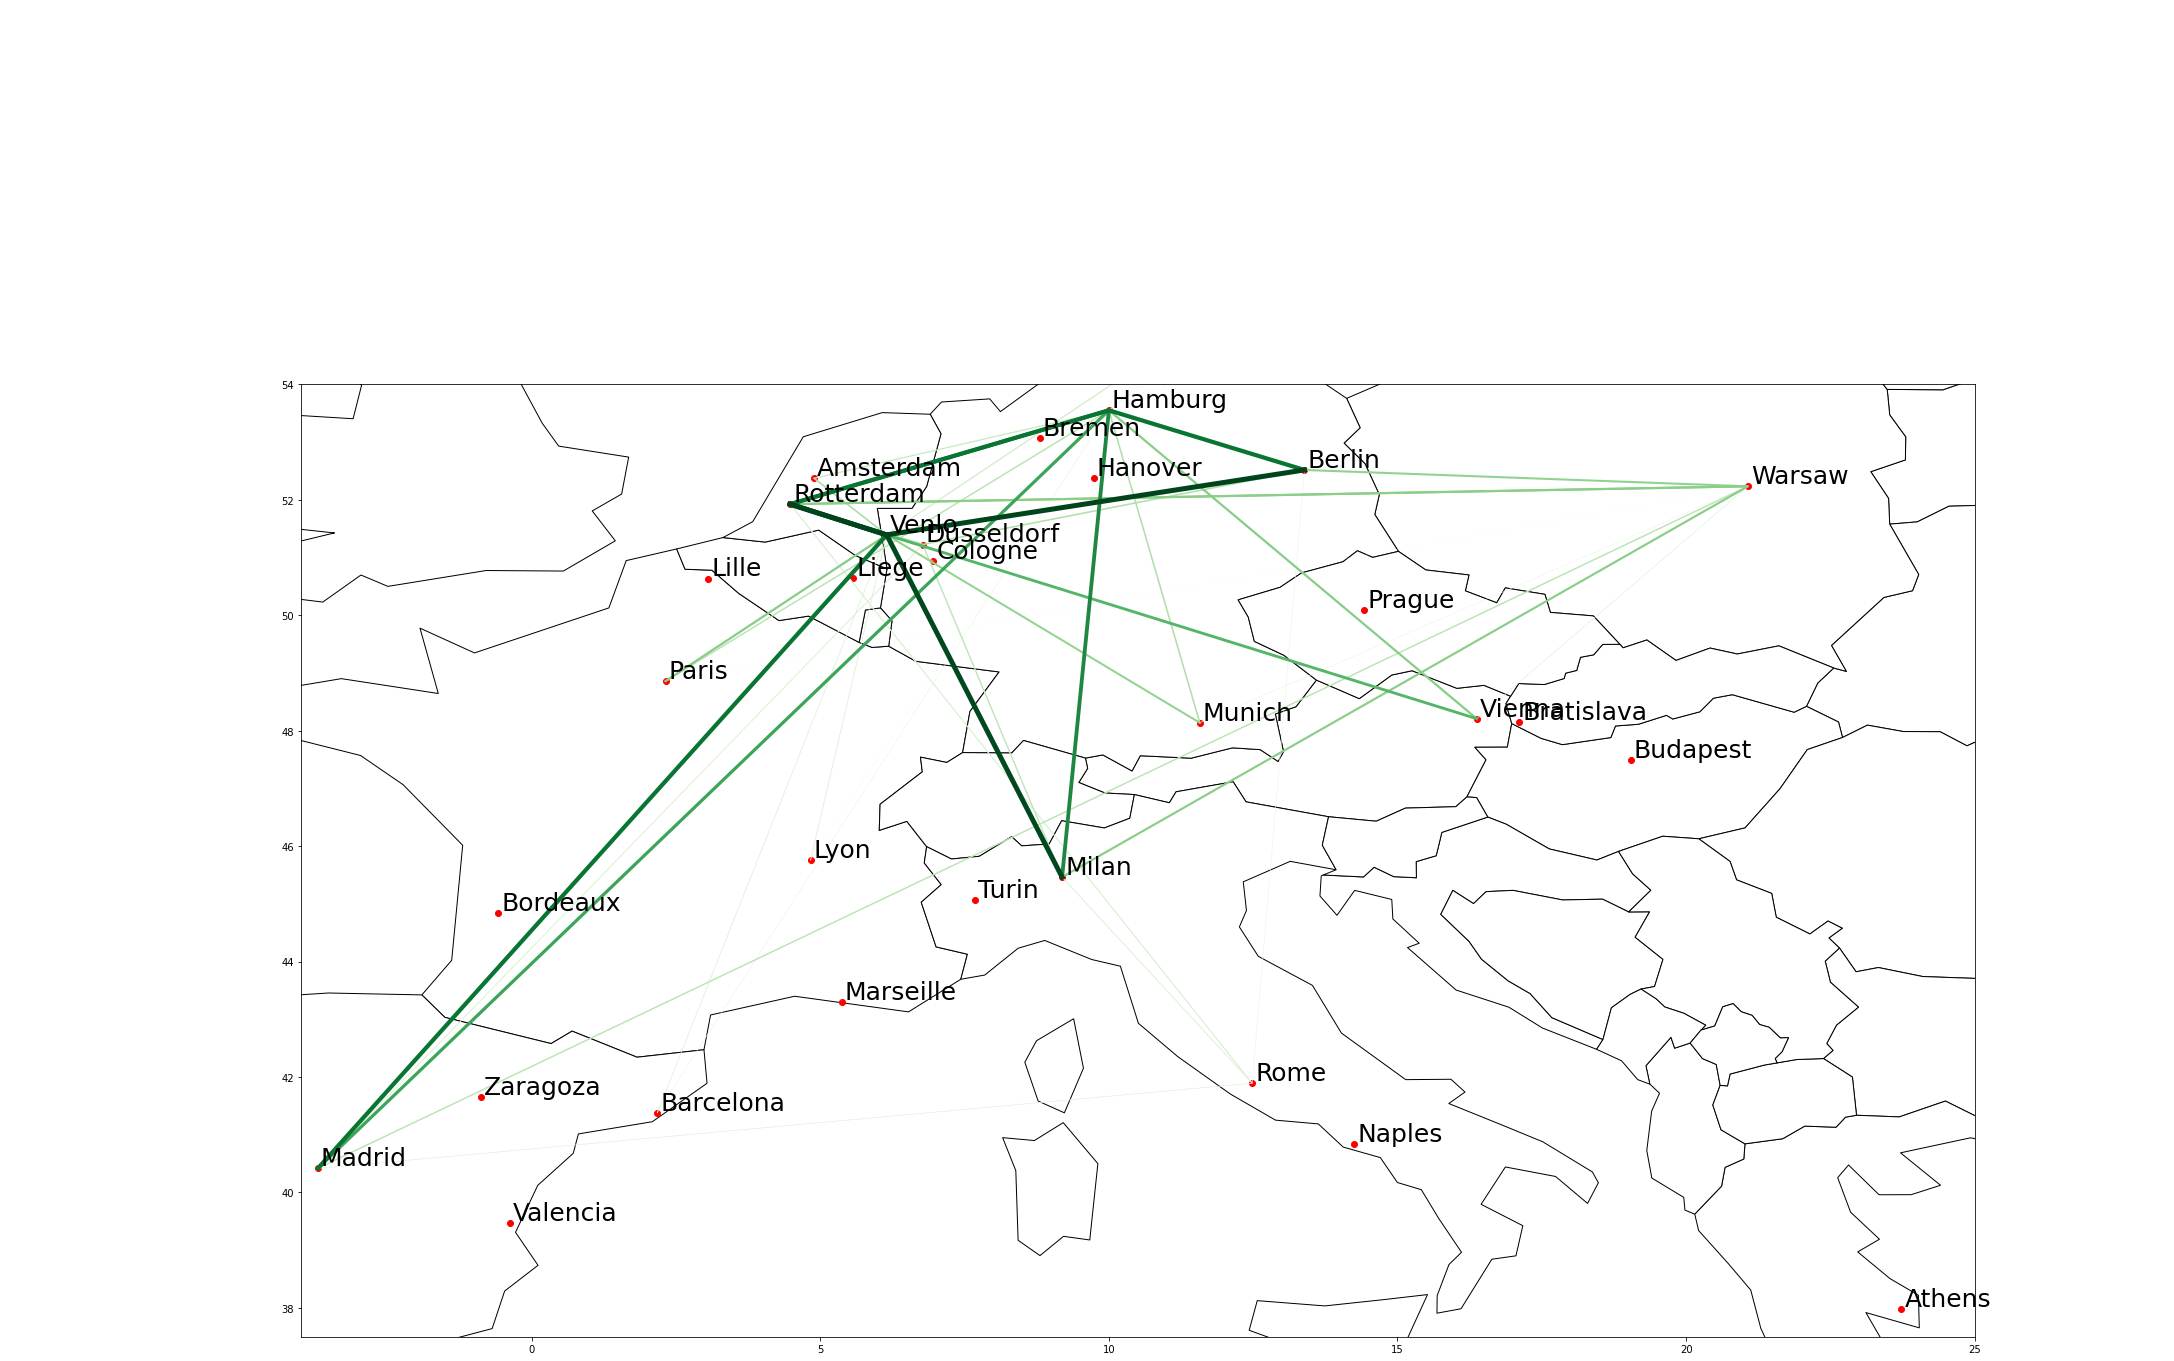

In [201]:
cmap = plt.cm.get_cmap('Greens')


ax = europe.plot(
    color='white', edgecolor='black', figsize=(30, 30))
cities_gdf.plot(ax=ax, color='r')

for la, lo, label in zip(cities_gdf['Latitude'], cities_gdf['Longitude'], cities_gdf['city']):
    ax.annotate(label, xy=(lo, la), xytext=(3, 3), textcoords="offset points", size=25)

for i, order in df[::-1].iterrows():
  o, l, c, im = order[['origin_port', 'logistic_hub', 'customer',  'performance_metric']]
  if l != '' and c != '' and o != '':
    slat, slong = cities_gdf[cities_gdf['city'] == o].iloc[0][['Latitude', 'Longitude']]
    mlat, mlong = cities_gdf[cities_gdf['city'] == l].iloc[0][['Latitude', 'Longitude']]
    dlat, dlong = cities_gdf[cities_gdf['city'] == c].iloc[0][['Latitude', 'Longitude']]
    ax.plot([slong, mlong, dlong], [slat, mlat, dlat], linewidth=im * 5, color=cmap(im))

ax.set_xlim([-4, 25])
ax.set_ylim([37.5, 54])
plt.show()

## Others

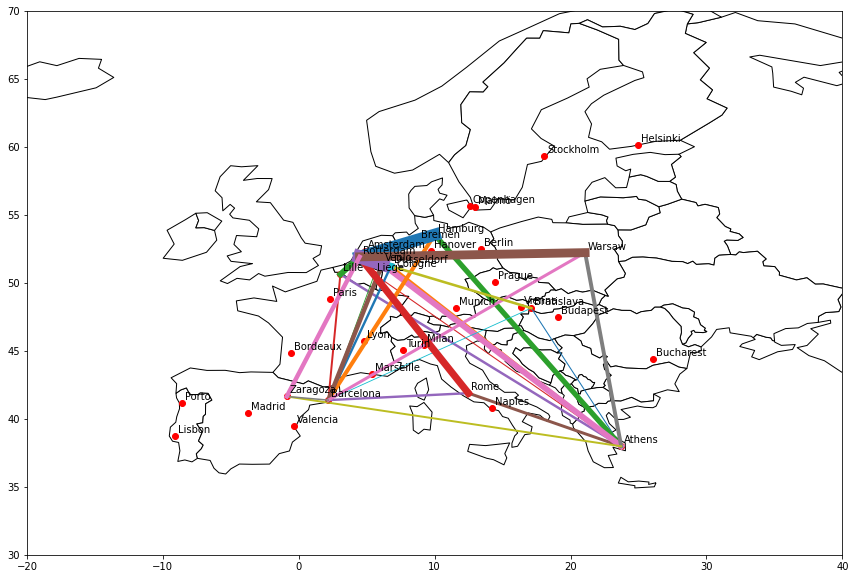

In [188]:
ax = europe.plot(
    color='white', edgecolor='black', figsize=(20, 10))
cities_gdf.plot(ax=ax, color='r')
for la, lo, label in zip(cities_gdf['Latitude'], cities_gdf['Longitude'], cities_gdf['city']):
    ax.annotate(label, xy=(lo, la), xytext=(3, 3), textcoords="offset points")

for i, order in o_to_l.iterrows():
  o, l, n_orders = order[['origin_port', 'logistic_hub', 'orders']]
  if l != '':
    slat, slong = cities_gdf[cities_gdf['city'] == o].iloc[0][['Latitude', 'Longitude']]
    dlat, dlong = cities_gdf[cities_gdf['city'] == l].iloc[0][['Latitude', 'Longitude']]
    ax.plot([slong, dlong], [slat, dlat], linewidth=n_orders/1000)

ax.set_xlim([-20, 40])
ax.set_ylim([30, 70])
plt.show()

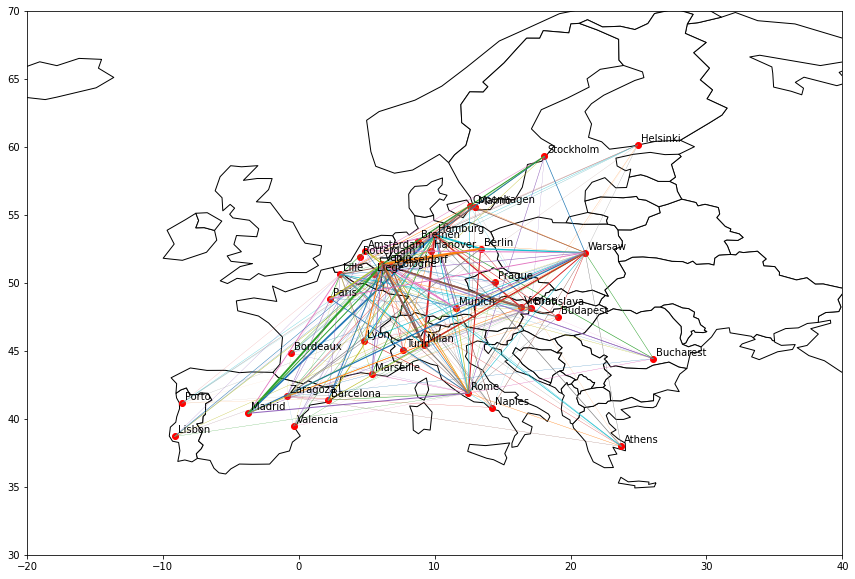

In [189]:
ax = europe.plot(
    color='white', edgecolor='black', figsize=(20, 10))
cities_gdf.plot(ax=ax, color='r')
for la, lo, label in zip(cities_gdf['Latitude'], cities_gdf['Longitude'], cities_gdf['city']):
    ax.annotate(label, xy=(lo, la), xytext=(3, 3), textcoords="offset points")

for i, order in l_to_c.iterrows():
  l, c, n_orders = order[['logistic_hub', 'customer', 'orders']]
  if l != '' and c != '':
    slat, slong = cities_gdf[cities_gdf['city'] == l].iloc[0][['Latitude', 'Longitude']]
    dlat, dlong = cities_gdf[cities_gdf['city'] == c].iloc[0][['Latitude', 'Longitude']]
    ax.plot([slong, dlong], [slat, dlat], linewidth=n_orders/1000)

ax.set_xlim([-20, 40])
ax.set_ylim([30, 70])
plt.show()

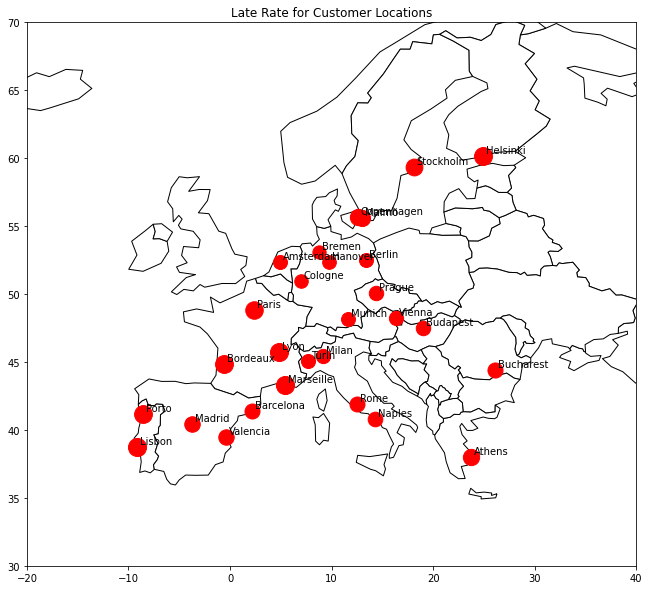

In [191]:
ax = europe.plot(
    color='white', edgecolor='black', figsize=(20, 10))

for i, data in late_order_by_costumer.iterrows():
    c = cities_gdf[cities_gdf['city'] == data['customer']].iloc[0]
    la, lo, label = c['Latitude'], c['Longitude'], data['customer']
    late_rate = data['late_rate']
    ax.scatter(c['Longitude'], c['Latitude'], color='r', s=late_rate*1000.0)
    ax.annotate(label, xy=(lo, la), xytext=(3, 3), textcoords="offset points")

ax.set_xlim([-20, 40])
ax.set_ylim([30, 70])
plt.title('Late Rate for Customer Locations')
plt.show()

In [197]:
# throw out data points whit few orders
# line_with = number of orders, line_color (green -> red) = perform_rate, 
# df = orders.groupby(by=['origin_port', 'logistic_hub', 'customer'], as_index=False)\
#   .agg(late_order=('late_order', sum), total_orders=('late_order', 'count'))
# 
# df = df.sort_values(by="total_orders")
# df['late_rate'] = df['late_order'] / df['total_orders']
# # df = df[df['late_rate'] > np.percentile(df['late_rate'], 30)]
# plt.hist(df['total_orders'])
# plt.title('total orders')
# plt.show()
# plt.hist(df['late_rate'])
# plt.title('late rate')
# plt.show()
# display(df.head())
